In [2]:
import pandas as pd
primekg = pd.read_csv('kg.csv', low_memory=False)
primekg.query('y_type=="disease"|x_type=="disease"')

,relation,display_relation,x_index,x_id,x_type,x_name,x_source,y_index,y_id,y_type,y_name,y_source
346728,contraindication,contraindication,15193,DB05271,drug,Rotigotine,DrugBank,33577,5044,disease,hypertensive disorder,MONDO
346729,contraindication,contraindication,15193,DB05271,drug,Rotigotine,DrugBank,36035,1200_1134_15512_5080_100078,disease,hypertension,MONDO_grouped
346730,indication,indication,16687,DB00492,drug,Fosinopril,DrugBank,33577,5044,disease,hypertensive disorder,MONDO
346731,indication,indication,16687,DB00492,drug,Fosinopril,DrugBank,36035,1200_1134_15512_5080_100078,disease,hypertension,MONDO_grouped
346732,contraindication,contraindication,14483,DB13956,drug,Estradiol valerate,DrugBank,33577,5044,disease,hypertensive disorder,MONDO
...,...,...,...,...,...,...,...,...,...,...,...,...
6499510,exposure_disease,linked to,31393,11565,disease,metabolic syndrome X,MONDO,61825,D015032,exposure,Zinc,CTD
6499511,exposure_disease,linked to,28208,5148,disease,type 2 diabetes mellitus,MONDO,61825,D015032,exposure,Zinc,CTD
6499512,exposure_disease,linked to,84172,1076,disease,glucose intolerance,MONDO,61825,D015032,exposure,Zinc,CTD
6499513,exposure_disease,linked to,33063,100130,disease,adult acute respiratory distress syndrome,MONDO,61825,D015032,exposure,Zinc,CTD


In [3]:
%pip install PyTDC

Defaulting to user installation because normal site-packages is not writeable
  Using cached pytdc-1.1.15-py3-none-any.whl
  Using cached accelerate-0.33.0-py3-none-any.whl.metadata (18 kB)
  Using cached dataclasses-0.6-py3-none-any.whl.metadata (3.0 kB)
  Using cached datasets-2.19.2-py3-none-any.whl.metadata (19 kB)
  Using cached evaluate-0.4.2-py3-none-any.whl.metadata (9.3 kB)
  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata (4.9 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached scikit_learn-1.7.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached transformers-4.50.3-py3-none-any.whl.metadata (39 kB)
  Using cached cellxgene_census-1.15.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached gget-0.29.3-py3-none-any.whl.metadat

In [ ]:
from tdc.resource import PrimeKG

data = PrimeKG(path = './data')
drug_feature = data.get_features(feature_type='drug')

G = data.to_nx()  # NetworkX Graph

#   Approach 1: Using positional arguments
disease_nodes = data.get_node_list('disease')

#   Approach 2: Using the new parameter name (most likely this one)
# disease_nodes = data.get_node_list(node_type='disease')

len(disease_nodes)
disease_nodes[:5]

Found local copy...
Loading...
Found local copy...
Loading...


array(['1', '1000', '10000', '100000', '100001'], dtype='<U523')

In [ ]:
# 1) Get the feature table for all disease nodes
disease_feature = data.get_features(feature_type='disease')

# Check the columns
disease_feature.columns
disease_feature.head()

Downloading...
100%|██████████| 114M/114M [00:09<00:00, 12.4MiB/s] 
Loading...


,node_index,mondo_id,mondo_name,group_id_bert,group_name_bert,mondo_definition,umls_description,orphanet_definition,orphanet_prevalence,orphanet_epidemiology,orphanet_clinical_description,orphanet_management_and_treatment,mayo_symptoms,mayo_causes,mayo_risk_factors,mayo_complications,mayo_prevention,mayo_see_doc
0,27165,8019,mullerian aplasia and hyperandrogenism,NaN,NaN,"Deficiency of the glycoprotein WNT4, associate...","Deficiency of the glycoprotein wnt4, associate...","A rare syndrome with 46,XX disorder of sex dev...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27165,8019,mullerian aplasia and hyperandrogenism,NaN,NaN,"Deficiency of the glycoprotein WNT4, associate...","Deficiency of the glycoprotein wnt4, associate...","A rare syndrome with 46,XX disorder of sex dev...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27166,11043,"myelodysplasia, immunodeficiency, facial dysmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27168,8878,"bone dysplasia, lethal Holmgren type",NaN,NaN,Bone dysplasia lethal Holmgren type (BDLH) is ...,A lethal bone dysplasia with characteristics o...,Bone dysplasia lethal Holmgren type (BDLH) is ...,<1/1000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27169,8905,predisposition to invasive fungal disease due ...,NaN,NaN,NaN,NaN,"A rare, genetic primary immunodeficiency chara...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from tdc.resource import PrimeKG
import networkx as nx
import matplotlib.pyplot as plt

# 1. Reload data & graph
data = PrimeKG(path='./data')
G = data.to_nx()

# 2. Disease feature table
disease_feature = data.get_features(feature_type='disease')

nodes_in_graph = set(G.nodes())

# 3. Automatically find: which column in disease_feature intersects with G.nodes()
candidates = []
for col in disease_feature.columns:
    overlap = set(disease_feature[col].astype(str)).intersection(nodes_in_graph)
    if len(overlap) > 0:
        candidates.append((col, len(overlap)))

print("Columns possibly serving as graph node IDs and intersection counts:")
print(candidates)

# 4. Select the column with the most overlap as the actual node_id column
id_col = max(candidates, key=lambda x: x[1])[0]
print("Using this column as the disease node ID in the graph:", id_col)

# 5. Extract disease nodes that actually exist in the graph
disease_node_ids = set(disease_feature[id_col].astype(str))
disease_in_graph = list(disease_node_ids.intersection(nodes_in_graph))

print("Number of disease nodes actually present in the graph:", len(disease_in_graph))
print("First few disease node IDs:", disease_in_graph[:10])

Found local copy...
Loading...
Found local copy...
Loading...


可能作为图节点ID的列及交集数量：
[('mondo_name', 16619), ('group_name_bert', 1267), ('umls_description', 4)]
使用这一列作为图里的疾病节点ID： mondo_name
图里真实存在的疾病节点数量： 16619
前几个疾病节点ID： ['proliferative fasciitis', 'CADDS', 'verruciform xanthoma of skin', 'acrofacial dysostosis Rodriguez type', 'metabolic disease with cataract', "rolandic epilepsy-paroxysmal exercise-induced dystonia-writer's cramp syndrome", 'split hand or/and split foot malformation', 'primary interstitial lung disease in childhood and adulthood due to alveolar structure disorder', 'Stickler syndrome', 'serous adenofibroma']


中心疾病： angiocentric glioma
邻居数量： 46
前几个邻居： ['Sirolimus', 'Temsirolimus', 'Carmustine', 'Procarbazine', 'ALK', 'CCND1', 'BRAF', 'CDK4', 'CDKN2A', 'CTNNB1']


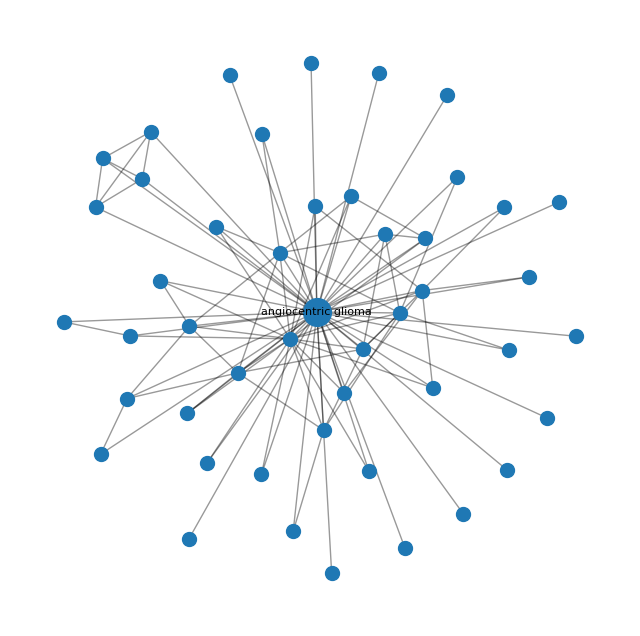

In [ ]:
import matplotlib.pyplot as plt

# Use the 'disease_in_graph' calculated earlier
# Pick an arbitrary disease as the center node, e.g., the 20th one
center = disease_in_graph[20]
print("Center disease:", center)

# Get its neighbors
neighbors = list(G.neighbors(center))
print("Number of neighbors:", len(neighbors))
print("First few neighbors:", neighbors[:10])

# To prevent the graph from becoming too cluttered, select only the first 50 neighbors
sub_nodes = [center] + neighbors[:50]
H = G.subgraph(sub_nodes)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(H, k=0.3)

# Draw the center disease node larger
nx.draw_networkx_nodes(H, pos,
                       nodelist=[center],
                       node_size=400)

# Draw other neighbor nodes
others = [n for n in H.nodes() if n != center]
nx.draw_networkx_nodes(H, pos,
                       nodelist=others,
                       node_size=100)

nx.draw_networkx_edges(H, pos, alpha=0.4)

# Optional: Label only the center node to avoid clutter
nx.draw_networkx_labels(H, pos,
                        labels={center: center},
                        font_size=8)

plt.axis("off")
plt.show()

In [18]:
import os

export_dir = "./export_primekg"
os.makedirs(export_dir, exist_ok=True)
export_dir


'./export_primekg'

In [ ]:
import pandas as pd

# If you already have `data` and `G` from previous steps, you don't need to rebuild them
# from tdc.resource import PrimeKG
# data = PrimeKG(path='./data')
# G = data.to_nx()

node_rows = []
for n, attr in G.nodes(data=True):
    row = {"node_id": n}
    # Flatten all node attributes, such as type, name, source, etc.
    row.update(attr)
    node_rows.append(row)

nodes_df = pd.DataFrame(node_rows)
nodes_path = os.path.join(export_dir, "primekg_nodes.csv")
nodes_df.to_csv(nodes_path, index=False)
nodes_df.head(), nodes_path

(  node_id
 0  PHYHIP
 1   KIF15
 2  GPANK1
 3   PNMA1
 4   ZRSR2,
 './export_primekg/primekg_nodes.csv')

In [ ]:
import networkx as nx

edges_df = nx.to_pandas_edgelist(G)   # edge name：source, target, key / weight / relation
edges_path = os.path.join(export_dir, "primekg_edges.csv")
edges_df.to_csv(edges_path, index=False)
edges_df.head(), edges_path


(   source  target         relation
 0  PHYHIP   KIF15  protein_protein
 1  PHYHIP  DYRK1A  protein_protein
 2  PHYHIP   ZZEF1  protein_protein
 3  PHYHIP  PNPLA2  protein_protein
 4  PHYHIP  NDUFV3  protein_protein,
 './export_primekg/primekg_edges.csv')

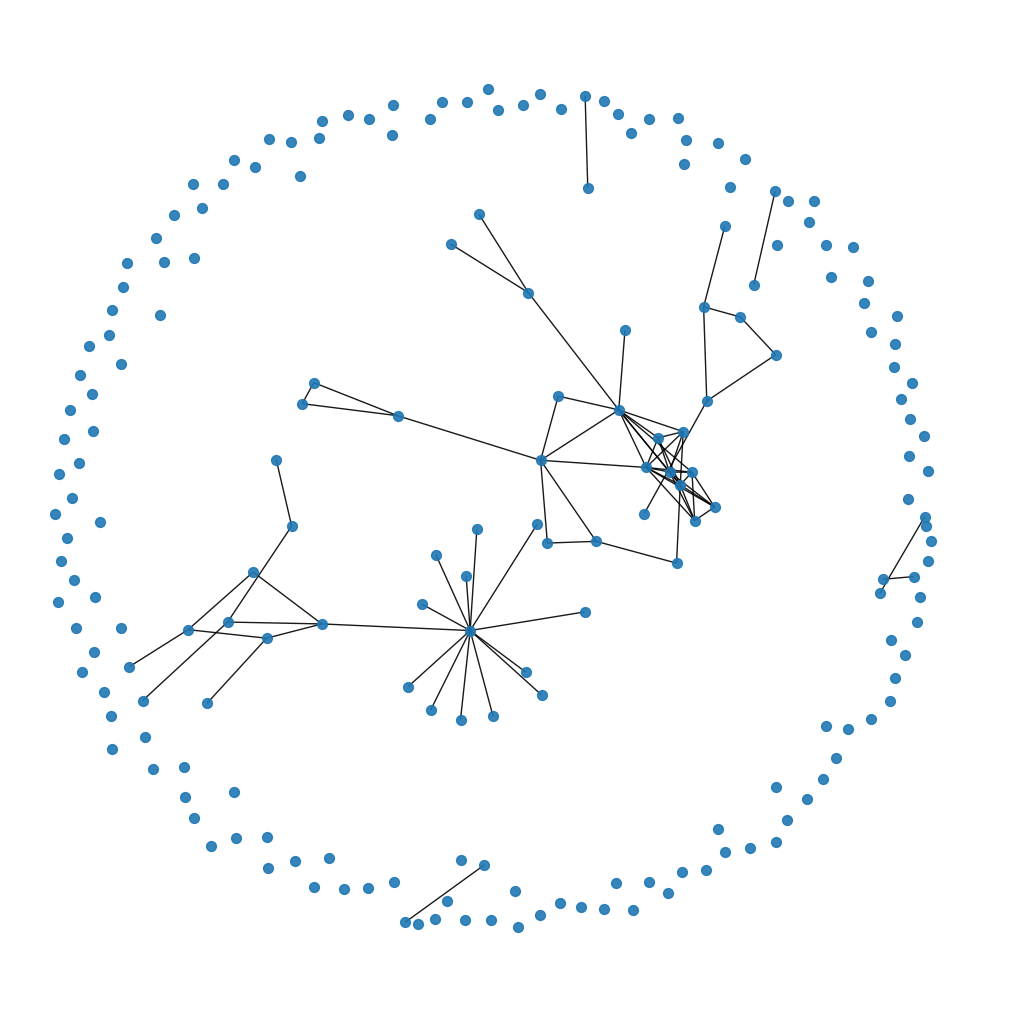

In [ ]:
import matplotlib.pyplot as plt

# 1) Filter high-degree nodes
high_degree_nodes = [n for n, d in G.degree() if d >= 20]

# 2) Sample a small subset from these nodes
import random
sample = random.sample(high_degree_nodes, 200)

H = G.subgraph(sample)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(H, k=0.4, iterations=80)

nx.draw(H, pos, node_size=50, alpha=0.9, with_labels=False)
plt.axis("off")
plt.show()

子图节点数： 7481
子图边数： 207441


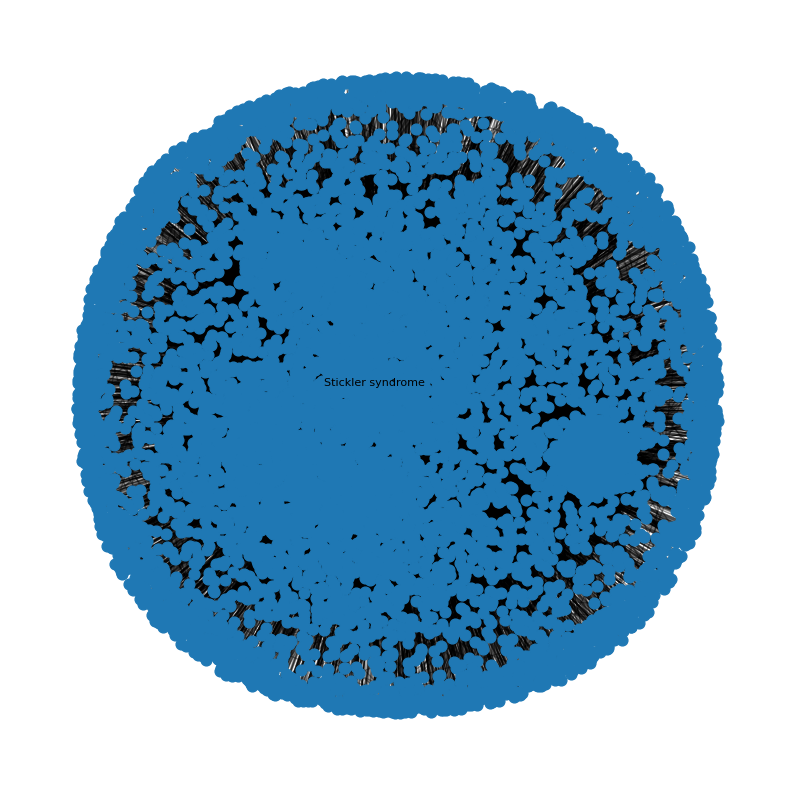

In [ ]:
import matplotlib.pyplot as plt

center = 'Stickler syndrome'   # Change to the disease name you are interested in
assert center in G.nodes(), "This disease name is not in the graph, please choose another one"

# 1-hop neighbors
nbrs1 = set(G.neighbors(center))

# 2-hop neighbors (neighbors of neighbors)
nbrs2 = set()
for n in nbrs1:
    nbrs2.update(G.neighbors(n))

sub_nodes = set([center]) | nbrs1 | nbrs2
H = G.subgraph(sub_nodes)

print("Subgraph node count:", H.number_of_nodes())
print("Subgraph edge count:", H.number_of_edges())

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(H, k=0.35, iterations=80)

# Draw center node
nx.draw_networkx_nodes(H, pos,
                       nodelist=[center],
                       node_size=400)

# Other nodes
others = [n for n in H.nodes() if n != center]
nx.draw_networkx_nodes(H, pos,
                       nodelist=others,
                       node_size=60)

nx.draw_networkx_edges(H, pos, alpha=0.4)

# Label only the center to avoid clutter
nx.draw_networkx_labels(H, pos,
                        labels={center: center},
                        font_size=8)

plt.axis("off")
plt.show()

In [27]:
%pip install pyvis

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pyvis]
Note: you may need to restart the kernel to use updated packages.
